In [1]:
#Dataset:
from preprocessed_mnist import load_dataset
import preprocessed_mnist as mnist
import matplotlib.pyplot as plt

X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import numpy as np
#------------------------------- Placeholders -----------------------------
#parameters:
allXdata = X_train.shape[1]*X_train.shape[1]  #28x28
allYdata = 10   #number of digits 0-9

#we define inputs (will accept images 28x28 pixels and number of digits 0-9)
input_X = tf.placeholder('float32', shape=(None,allXdata))
input_y= tf.placeholder('float32', shape=(None,allYdata))

X_train = X_train.reshape([X_train.shape[0], allXdata])
X_test = X_test.reshape([X_test.shape[0], allXdata])
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [3]:
nod = 80  #number of neurons
#------------------------------- input layer -----------------------------
w1 =tf.Variable(tf.random_normal([allXdata, nod]))
b1 = tf.Variable(tf.random_normal([nod]))

#------------------------------- network body -----------------------------
#Define weights and bias of the first layer:
w2 =tf.Variable(tf.random_normal([nod, nod]))
b2 = tf.Variable(tf.random_normal([nod]))

#------------------------------- output layer -----------------------------
#10 neurons for each class 
w3 =tf.Variable(tf.random_normal([nod, allYdata]))
b3 = tf.Variable(tf.random_normal([allYdata]))

In [4]:
#Model the neural network:
#------------------------------- input layer -----------------------------
layer1 = tf.nn.relu(tf.matmul(input_X, w1) + b1)

#------------------------------- network body -----------------------------
layer2 = tf.nn.tanh(tf.matmul(layer1, w2) + b2)

#------------------------------- output layer -----------------------------
layer3 = tf.nn.sigmoid(tf.matmul(layer2, w3) + b3)

In [5]:
#Define the loss:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=input_y, logits=layer3))

#Define the optimizer:
optimizer = tf.train.AdamOptimizer(1e-2).minimize(loss)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(layer3,1), tf.argmax(input_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Train & test losses for 10 epochs: 1.52996 , 1.53007
Train & test losses for 20 epochs: 1.50962 , 1.51293
Train & test losses for 30 epochs: 1.50272 , 1.5074
Train & test losses for 40 epochs: 1.49666 , 1.50157
Train & test losses for 50 epochs: 1.49361 , 1.49937
Train & test losses for 60 epochs: 1.48991 , 1.49677
Train & test losses for 70 epochs: 1.48875 , 1.49372
Train & test losses for 80 epochs: 1.48738 , 1.49446
Train & test losses for 90 epochs: 1.48693 , 1.49472
Train & test losses for 100 epochs: 1.48308 , 1.49016


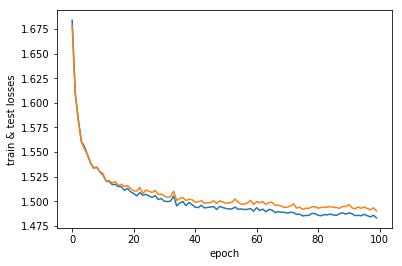

Test Accuracy: 0.9645


In [6]:
#Evaluate the model and results:
batch_size = 500
with tf.Session() as sess:
    sess.run(init)
    train_loss = []
    test_loss = []
    for epoch in range(100):
        for i in range(0, X_train.shape[0], batch_size):
            sess.run(optimizer, feed_dict={input_X:X_train[i:i+batch_size], input_y:y_train[i: i+batch_size]})
        train_loss.append(sess.run(loss, feed_dict={input_X:X_train, input_y:y_train}))
        test_loss.append(sess.run(loss, feed_dict={input_X:X_test, input_y:y_test}))
        if epoch%10 == 9:
            print("Train & test losses for " + str(epoch+1)+ " epochs: "+ str(train_loss[-1]) + " , "+ str(test_loss[-1]))
    
    #------------------------------- Plot results -----------------------------
    n = list(range(100))
    plt.plot(n, train_loss, label='Train')
    plt.plot(n, test_loss, label='Test')
    plt.ylabel('train & test losses')
    plt.xlabel('epoch')
    plt.show()
    
    #------------------------------- Print the test accuracy -----------------------------
    print("Test Accuracy:", sess.run(accuracy, feed_dict={input_X:X_test, input_y:y_test}))